In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

seed=2024
np.random.seed(seed)

In [2]:
#config
num_classes = 6
prefix = '6C'

df_full_augmented = pd.read_csv("../../data/dataframes/all_patchs_dataframe_augmented.csv")
#df_full_not_augmented = pd.read_csv("../../data/dataframes/all_patchs_dataframe.csv")

# select the rows where the patch name are are valid 
regex = r'_row_\d+_col_\d+'
regex_general = r'row_.*_col_.*'

valid_duplicates =  r'_row_\d+_col_\d+\(\d+\)'

list_classes = df_full_augmented['classe'].unique()
list_labels = [0, 1, 2, 3, 4, 5]
list_classes, list_labels

(array(['Acinaire', 'Fibrose', 'Foetal', 'Glandulaire complexe',
        'Hémorragique', 'Lépidique', 'Micropapillaire', 'Mucineux',
        'Normal', 'Nécrose', 'Papillaire', 'Réactionnel', 'Solide',
        'Tissu lymphoïde'], dtype=object),
 [0, 1, 2, 3, 4, 5])

In [3]:
if prefix == "6C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'T', 'Acinaire':'T','Foetal':'T','Lépidique':'T','Mucineux':'T', 'Papillaire':'T',
                'Solide':'T', 'Glandulaire complexe':'T','Micropapillaire':'T'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'T':5}
elif prefix=="7C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'TuGr12', 'Acinaire':'TuGr12','Foetal':'TuGr12','Lépidique':'TuGr12','Mucineux':'TuGr12', 'Papillaire':'TuGr12',
                'Solide':'TuGr3', 'Glandulaire complexe':'TuGr3','Micropapillaire':'TuGr3'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'TuGr12':5, "TuGr3":6}
    
label_to_idx = {v:k for k,v in idx_to_label.items()}

label_to_idx

{0: 'P', 1: 'H', 2: 'Né', 3: 'TL', 4: 'Fi', 5: 'T'}

In [4]:
df_full_augmented['tetraClass'] = df_full_augmented['classe'].apply(lambda x : all_classes[x]) 
df_full_augmented['label'] = df_full_augmented['tetraClass'].apply(lambda x: idx_to_label[x])
df_full_augmented = df_full_augmented.sort_values(by='label')
df_full_augmented

,Patient,lame,patch,classe,tetraClass,label
41686,9,No,No_9_S (56)_HF.jpg,Normal,P,0
59546,7,R,R_7_A (1089)_VF.jpg,Réactionnel,P,0
59547,398,R,R_398_A (23)_HF.jpg,Réactionnel,P,0
59548,7,R,R_7_A (23)_VF.jpg,Réactionnel,P,0
59549,398,R,R_398_A (578)_HF.jpg,Réactionnel,P,0
...,...,...,...,...,...,...
54740,2,B,2_B_row_59_col_48_VF.jpg,Papillaire,T,5
54741,398,P,P_398_A (2)_HF.jpg,Papillaire,T,5
54742,2,B,2_B_row_8_col_45_HF.jpg,Papillaire,T,5
54736,23,P,P_23_C (78)_HF.jpg,Papillaire,T,5


In [5]:
# remove duplicates
df_full_augmented = df_full_augmented[~df_full_augmented['patch'].str.contains(valid_duplicates)]
df_full_augmented

,Patient,lame,patch,classe,tetraClass,label
41686,9,No,No_9_S (56)_HF.jpg,Normal,P,0
59546,7,R,R_7_A (1089)_VF.jpg,Réactionnel,P,0
59547,398,R,R_398_A (23)_HF.jpg,Réactionnel,P,0
59548,7,R,R_7_A (23)_VF.jpg,Réactionnel,P,0
59549,398,R,R_398_A (578)_HF.jpg,Réactionnel,P,0
...,...,...,...,...,...,...
54739,72,P,P_72_B (8).jpg,Papillaire,T,5
54740,2,B,2_B_row_59_col_48_VF.jpg,Papillaire,T,5
54741,398,P,P_398_A (2)_HF.jpg,Papillaire,T,5
54742,2,B,2_B_row_8_col_45_HF.jpg,Papillaire,T,5


In [6]:
df_full_augmented_valid = df_full_augmented[df_full_augmented['patch'].str.contains(regex_general)]
df_full_augmented_not_valid = df_full_augmented[~df_full_augmented['patch'].str.contains(regex_general)]
df_full_augmented_valid

,Patient,lame,patch,classe,tetraClass,label
40628,2,B,2_B_row_28_col_36_VF.jpg,Normal,P,0
40624,44,A,44_A_row_23_col_118_VF.jpg,Normal,P,0
40639,40,A,40_A_row_217_col_94_HF.jpg,Normal,P,0
40660,2,B,2_B_row_85_col_33_HF.jpg,Normal,P,0
40656,44,A,44_A_row_43_col_109_HF.jpg,Normal,P,0
...,...,...,...,...,...,...
54733,2,B,2_B_row_8_col_44_VF.jpg,Papillaire,T,5
54734,2,B,2_B_row_46_col_52.jpg,Papillaire,T,5
54735,2,B,2_B_row_28_col_9.jpg,Papillaire,T,5
54740,2,B,2_B_row_59_col_48_VF.jpg,Papillaire,T,5


In [7]:
# print the valid patients
all_patients = sorted(df_full_augmented['Patient'].unique())
valid_patients = sorted(df_full_augmented_valid['Patient'].unique())
non_valid_patients = sorted(df_full_augmented_not_valid['Patient'].unique())
mixed_patients = list(set(valid_patients) & set(non_valid_patients))
print('all patients:', all_patients)
print('patients with valid data:', valid_patients)
print('patients with non valid data:', non_valid_patients)
print('patients with mixed data:', mixed_patients)

valid_patients = [patient for patient in valid_patients if patient not in mixed_patients]
print('patients with valid data:', valid_patients)

valid_patients.remove(58)
valid_patients.remove(226)
valid_patients.remove(133)
non_valid_patients.append(58)
non_valid_patients.append(226)
non_valid_patients.append(133)

print('\n\npatients test:', valid_patients)
print('patients train:', non_valid_patients)


all patients: [2, 3, 4, 5, 6, 7, 9, 13, 14, 16, 17, 22, 23, 32, 40, 44, 58, 72, 114, 133, 169, 192, 226, 230, 231, 247, 398]
patients with valid data: [2, 7, 13, 17, 32, 40, 44, 58, 133, 192, 226]
patients with non valid data: [3, 4, 5, 6, 7, 9, 14, 16, 22, 23, 72, 114, 169, 230, 231, 247, 398]
patients with mixed data: [7]
patients with valid data: [2, 13, 17, 32, 40, 44, 58, 133, 192, 226]


patients test: [2, 13, 17, 32, 40, 44, 192]
patients train: [3, 4, 5, 6, 7, 9, 14, 16, 22, 23, 72, 114, 169, 230, 231, 247, 398, 58, 226, 133]


In [20]:
patients_test={patient : 'test' for patient in valid_patients}
patients_train={patient : 'train' for patient in all_patients if patient not in valid_patients}

patients_to_dataset = {**patients_train, **patients_test}

print('Total n patients:', len(patients_to_dataset), '      n train patients:', len(patients_train), '     n test patients', len(patients_test))

df_full_augmented['dataset']=df_full_augmented['Patient'].apply(lambda x : patients_to_dataset[int(x)])

Total n patients: 27       n train patients: 20      n test patients 7


In [9]:
dtrain= df_full_augmented.loc[df_full_augmented['dataset']=='train']
dtest = df_full_augmented.loc[df_full_augmented['dataset']=='test']

print('number of training samples:', len(dtrain), '     number of test samples:', len(dtest))

number of training samples: 71601      number of test samples: 11089


In [10]:
# save the splits
support_split_path = "../../data/splits/"+prefix+"_support_augmented.csv"
query_split_path = "../../data/splits/"+prefix+"_query_augmented.csv"
dtrain.to_csv(support_split_path, index=False)
dtest.to_csv(query_split_path, index=False)

In [11]:
if prefix=="7C": 
    colors_tetraclass=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'gold', 'crimson']
elif prefix=="6C": 
    colors_tetraclass=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'crimson']
explode_tetraclass=tuple([0.05]*len(colors_tetraclass))

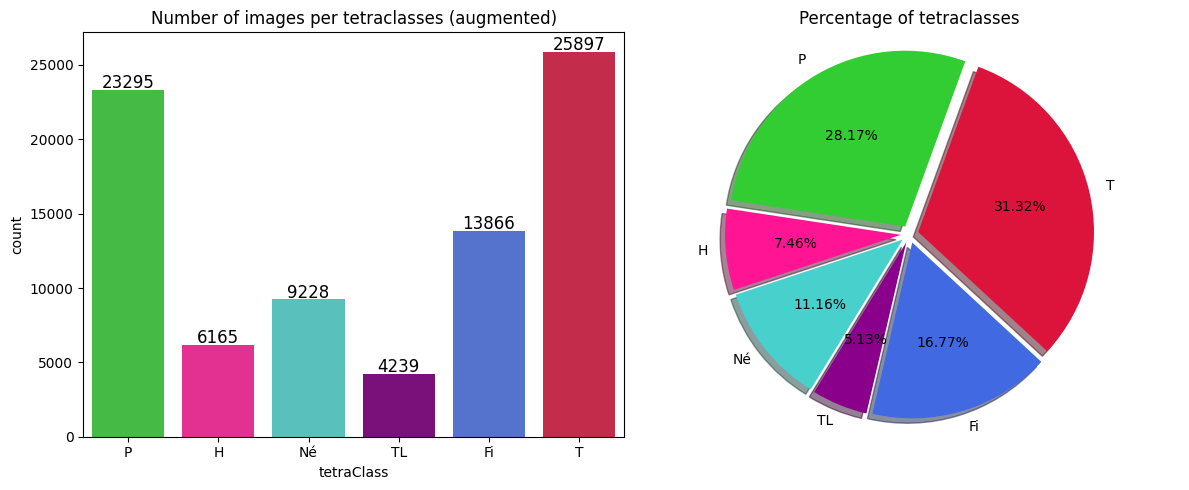

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df_full_augmented, x='tetraClass', palette=colors_tetraclass)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of images per tetraclasses (augmented)")
plt.subplot(122)
explode_tetraclass=tuple([0.05]*len(colors_tetraclass))
sizes = [df_full_augmented["tetraClass"].value_counts()[val] for val in idx_to_label.keys()]
plt.pie(sizes, explode=explode_tetraclass, colors=colors_tetraclass, labels=list(idx_to_label.keys()),  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of tetraclasses')
plt.tight_layout()
plt.savefig(f'Statistics of tetraclass splits {prefix} augmented.jpeg')
plt.show()

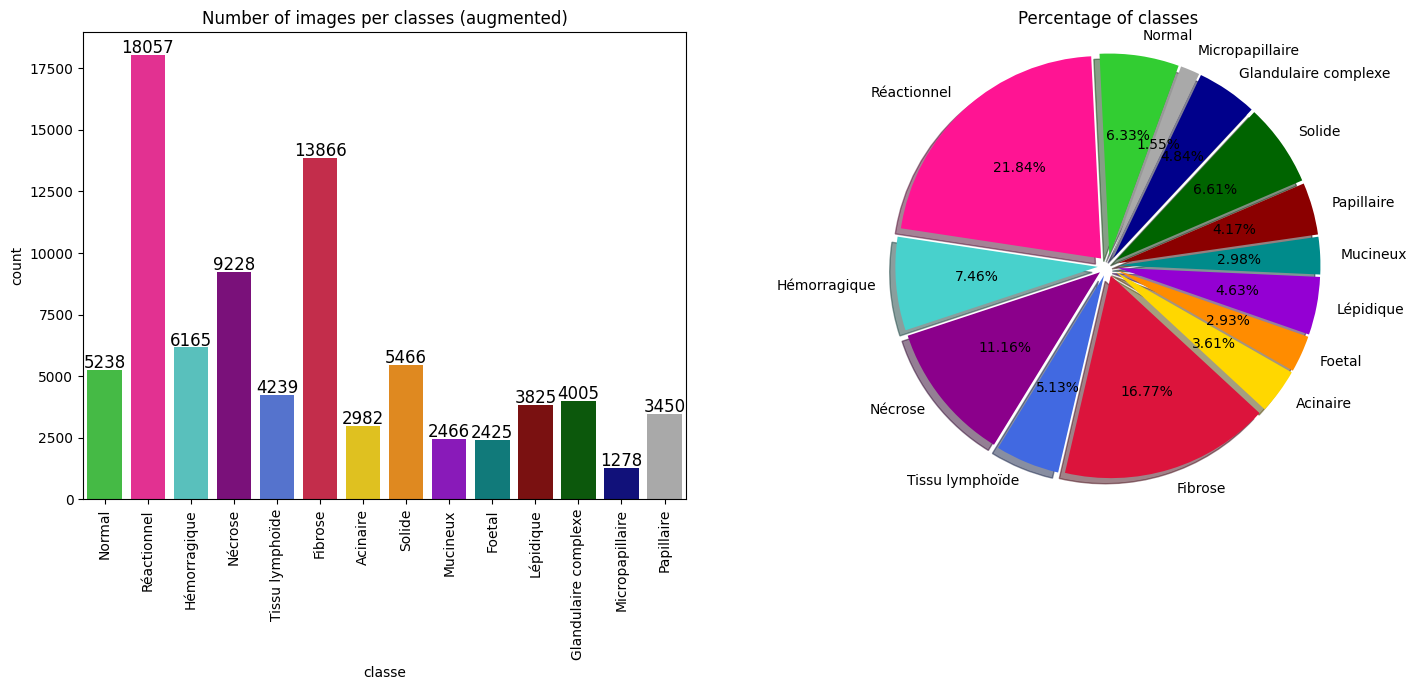

In [15]:
# 14 colors
colors_classe = ['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'crimson', 'gold', 'darkorange', 'darkviolet', 'darkcyan', 'darkred', 'darkgreen', 'darkblue', 'darkgrey']
explode_c=tuple([0.05]*len(colors_classe))
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.countplot(df_full_augmented, x='classe', palette=colors_classe)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation='vertical')
plt.title("Number of images per classes (augmented)")

plt.subplot(122)
sizes = [df_full_augmented["classe"].value_counts()[val] for val in all_classes.keys() if val in df_full_augmented["classe"].unique()]
plt.pie(sizes, explode=explode_c, colors=colors_classe, labels=[val for val in all_classes.keys() if val in df_full_augmented["classe"].unique()],  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of classes')
plt.tight_layout()
plt.savefig(f'Statistics of class splits {prefix} augmented.jpeg')
plt.show()

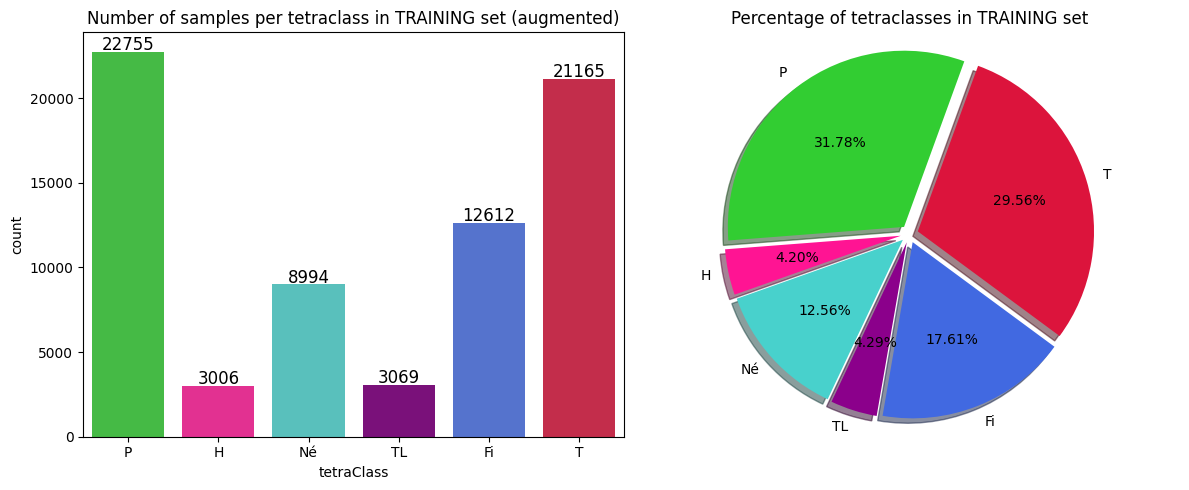

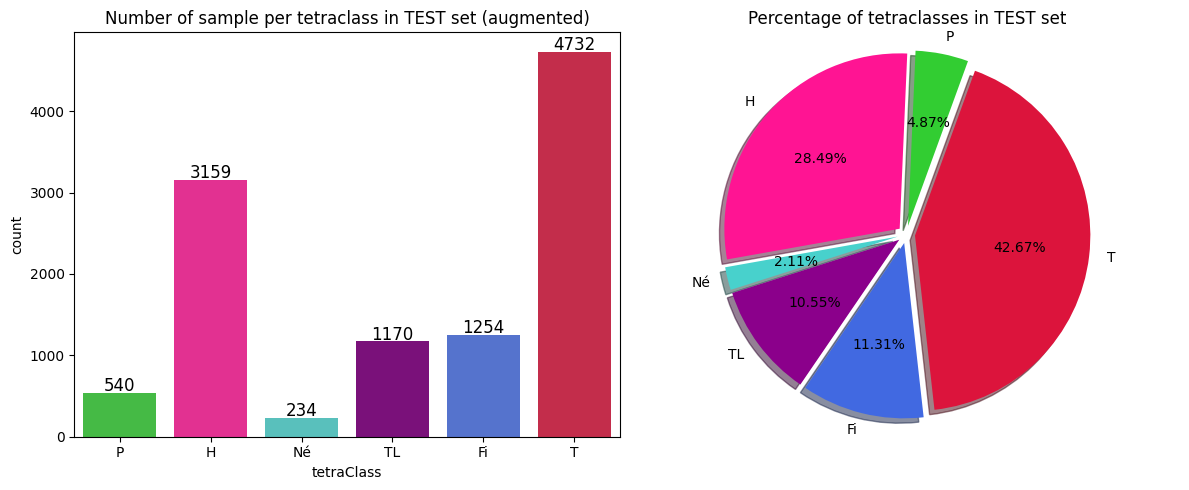

In [18]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df_full_augmented.loc[df_full_augmented['dataset']=='train'], x='tetraClass', palette=colors_tetraclass)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of samples per tetraclass in TRAINING set (augmented)")

plt.subplot(122)
sizes = [df_full_augmented.loc[df_full_augmented['dataset']=='train']["tetraClass"].value_counts()[val] for val in idx_to_label.keys()]
plt.pie(sizes, explode=explode_tetraclass, labels=list(idx_to_label.keys()), colors=colors_tetraclass,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of tetraclasses in TRAINING set')
plt.tight_layout()
plt.savefig(f'Statistics of training tetraclass splits {prefix} augmented.jpeg')
plt.show()

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df_full_augmented.loc[df_full_augmented['dataset']=='test'], x='tetraClass', palette=colors_tetraclass)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of samples per tetraclass in TEST set (augmented)")

plt.subplot(122)
sizes = [df_full_augmented.loc[df_full_augmented['dataset']=='test']["tetraClass"].value_counts()[val] for val in idx_to_label.keys()]
plt.pie(sizes, explode=explode_tetraclass, labels=list(idx_to_label.keys()), colors=colors_tetraclass,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of tetraclasses in TEST set')
plt.tight_layout()
plt.savefig(f'Statistics of testing tetraclass splits {prefix} augmented.jpeg')
plt.show()

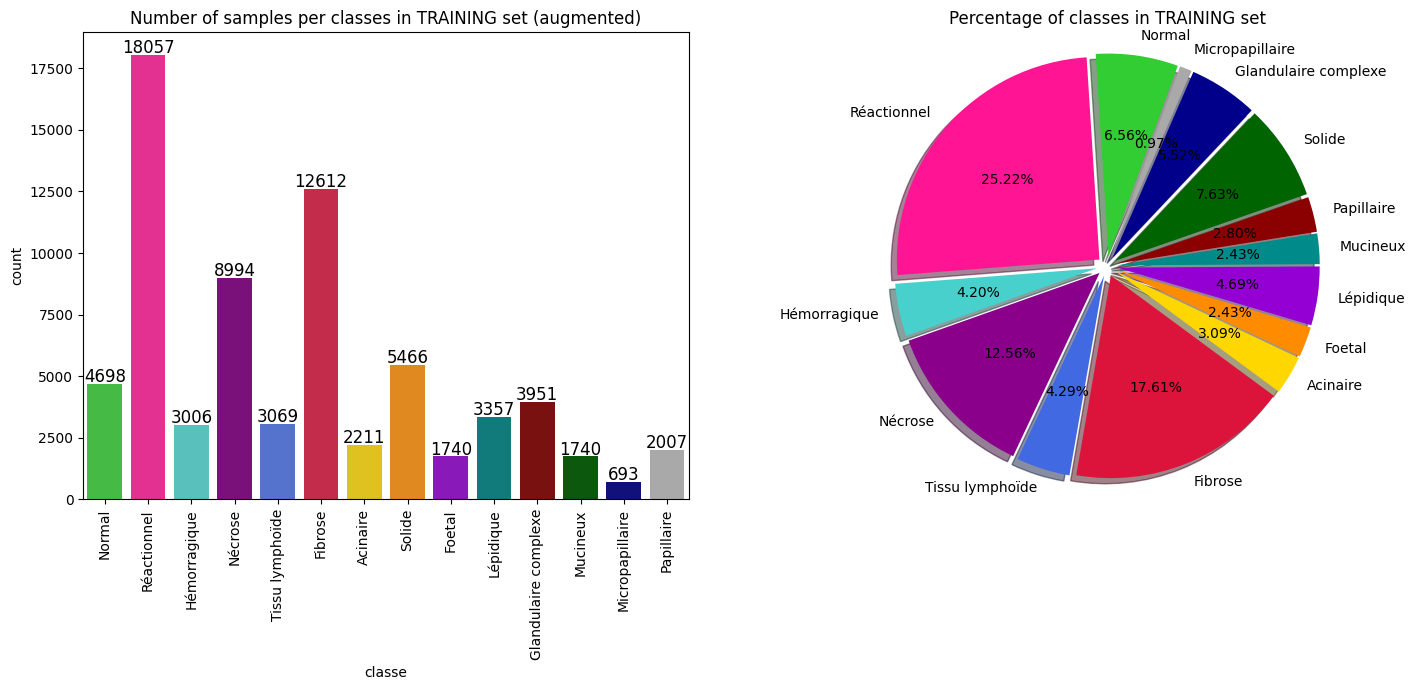

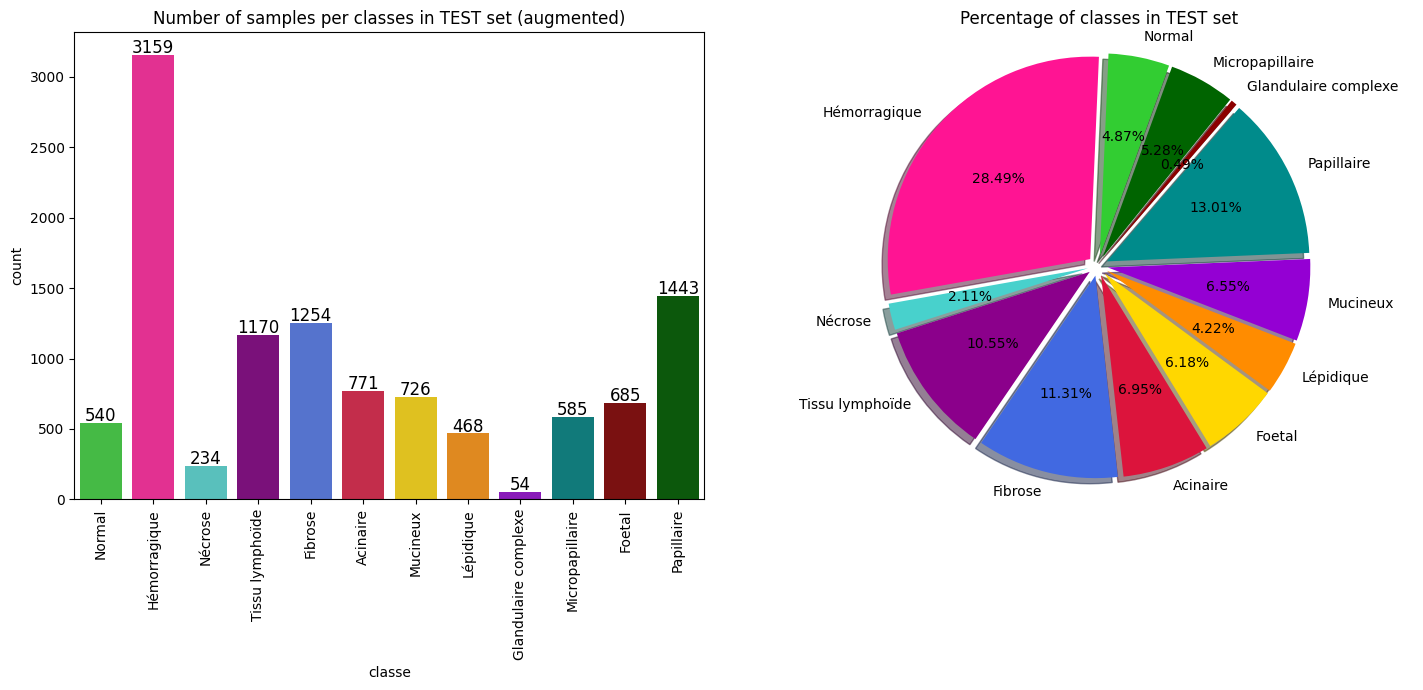

In [19]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.countplot(df_full_augmented.loc[df_full_augmented['dataset']=='train'], x='classe', palette=colors_classe)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation='vertical')
plt.title("Number of samples per classes in TRAINING set (augmented)")

plt.subplot(122)
sizes = [df_full_augmented.loc[df_full_augmented['dataset']=='train']["classe"].value_counts()[val] for val in all_classes.keys() if val in df_full_augmented["classe"].unique()]
plt.pie(sizes, explode=explode_c, labels=[val for val in all_classes.keys() if val in df_full_augmented["classe"].unique()], colors=colors_classe,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of classes in TRAINING set')
plt.tight_layout()
plt.savefig(f'Statistics of training class splits {prefix} augmented.jpeg')
plt.show()

plt.figure(figsize = (15,7))
plt.subplot(121)
sns.countplot(df_full_augmented.loc[df_full_augmented['dataset']=='test'], x='classe', palette=colors_classe)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation='vertical')
plt.title("Number of samples per classes in TEST set (augmented)")

plt.subplot(122)
sizes = [df_full_augmented.loc[df_full_augmented['dataset']=='test']["classe"].value_counts()[val] for val in all_classes.keys() if val in df_full_augmented.loc[df_full_augmented['dataset']=='test']["classe"].unique()]
expl_c=tuple([0.05]*len(sizes))
plt.pie(sizes, explode=expl_c, labels=[val for val in all_classes.keys() if val in df_full_augmented.loc[df_full_augmented['dataset']=='test']["classe"].unique()], colors=colors_classe,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Percentage of classes in TEST set')
plt.tight_layout()
plt.savefig(f'Statistics of testing class splits {prefix} augmented.jpeg')
plt.show()

In [79]:
for p in df_full_augmented['Patient'].unique():
    print(p,'\n',dict(df_full_augmented.loc[df_full_augmented['Patient']==p]['tetraClass'].value_counts()))

9 
 {'Né': 7596, 'Fi': 5652, 'P': 597, 'T': 345, 'H': 54}
7 
 {'P': 11859, 'Fi': 2346, 'T': 1812, 'TL': 846, 'H': 54}
398 
 {'P': 4917, 'H': 873, 'Fi': 204, 'T': 102}
247 
 {'T': 1104, 'P': 468, 'Fi': 24}
231 
 {'T': 5451, 'Fi': 3462, 'Né': 828, 'P': 810, 'TL': 387, 'H': 144}
169 
 {'T': 2070, 'P': 1593, 'H': 198, 'Fi': 144}
3 
 {'P': 1713, 'T': 108, 'Fi': 24, 'TL': 9}
6 
 {'T': 438, 'P': 159, 'H': 27}
2 
 {'T': 1845, 'Fi': 1248, 'H': 810, 'TL': 180, 'P': 159}
72 
 {'T': 3852, 'Fi': 756, 'TL': 414, 'P': 399, 'H': 36}
44 
 {'H': 1224, 'T': 726, 'P': 309}
40 
 {'T': 576, 'H': 126, 'TL': 18, 'P': 15}
4 
 {'TL': 603, 'T': 156, 'H': 72, 'P': 54}
13 
 {'T': 711, 'P': 36, 'TL': 27, 'Fi': 6}
23 
 {'T': 345, 'H': 135, 'P': 81, 'TL': 36, 'Né': 6}
58 
 {'H': 198, 'TL': 162, 'T': 54, 'P': 39}
5 
 {'T': 258, 'P': 45, 'TL': 36, 'H': 27}
192 
 {'T': 685, 'H': 423, 'TL': 117, 'P': 18}
14 
 {'T': 897, 'H': 108, 'TL': 27, 'P': 15}
17 
 {'Né': 234, 'H': 90, 'T': 36, 'TL': 27, 'P': 3}
22 
 {'T': 174, 'P':

In [91]:
# Assuming df1 and df2 are your dataframes
df1 = df_full_augmented[df_full_augmented['patch'].str.contains(regex_general)]
df2 = df_full_augmented[df_full_augmented['patch'].str.contains(regex)]
sub = df1.merge(df2, how='outer', indicator=True)
sub = sub[sub['_merge'] == 'left_only']
sub

,Patient,lame,patch,classe,_merge
13389,2,B,2_B_row_P_23_col_47_VF.jpg,Papillaire,left_only
13804,2,B,2_B_row_P_23_col_49.jpg,Papillaire,left_only
13822,2,B,2_B_row_P_23_col_49_HF.jpg,Papillaire,left_only
13928,2,B,2_B_row_P_23_col_50.jpg,Papillaire,left_only
13930,7,A,7_A_row_1P_23_col_15.jpg,Papillaire,left_only
13955,2,B,2_B_row_P_23_col_47_HF.jpg,Papillaire,left_only
13969,7,A,7_A_row_1P_23_col_15_VF.jpg,Papillaire,left_only
14001,2,B,2_B_row_P_23_col_48_VF.jpg,Papillaire,left_only
14040,2,B,2_B_row_P_23_col_51_HF.jpg,Papillaire,left_only
14184,2,B,2_B_row_P_23_col_52_HF.jpg,Papillaire,left_only


In [92]:
df7 = df_full_augmented[df_full_augmented['Patient'] == 7]
df7

,Patient,lame,patch,classe
4,7,A,A_7_A (237)_HF.jpg,Acinaire
5,7,A,A_7_A (86)_VF.jpg,Acinaire
10,7,A,A_7_A (15)_VF.jpg,Acinaire
15,7,A,A_7_A (77)_VF.jpg,Acinaire
23,7,A,A_7_A (12).jpg,Acinaire
...,...,...,...,...
83351,7,A,7_A_row_132_col_50_VF.jpg,Tissu lymphoïde
83355,7,A,7_A_row_130_col_50_rot90.jpg,Tissu lymphoïde
83360,7,A,7_A_row_131_col_67_rot45.jpg,Tissu lymphoïde
83368,7,TL,TL_7_A (43)_rot135.jpg,Tissu lymphoïde
